# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/ryanj/github/PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load = "C:/Users/ryanj/github/PyBer_Analysis/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby('type').count()['ride_id']
total_rides.head(2)

type
Rural       125
Suburban    625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = pyber_data_df.groupby('type').sum()['driver_count']
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby('type').sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_drivers
avg_fare_per_ride

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers
avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = {
    'total_rides': total_rides,
    'total_drivers': total_drivers,
    'total_fares': total_fares,
    'avg_fare_per_ride': avg_fare_per_ride,
    'avg_fare_per_driver': avg_fare_per_driver
}

pyber_summary_df = pd.DataFrame(pyber_summary)

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,total_rides,total_drivers,total_fares,avg_fare_per_ride,avg_fare_per_driver
Rural,125,537,4327.93,8.059460,8.059460
Suburban,625,8570,19356.33,2.258615,2.258615
Urban,1625,59602,39854.38,0.668675,0.668675


In [10]:
#  8. Format the columns.

#format total_rides so it has comma separator
pyber_summary_df.total_rides = pyber_summary_df['total_rides'].map("{:,}".format)

#format total_drivers so it has comma separator
pyber_summary_df.total_drivers = pyber_summary_df['total_drivers'].map("{:,}".format)

# Format total_fares to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df.total_fares = pyber_summary_df['total_fares'].map("${:,.2f}".format)

# Format avg_fare_per_ride to have a decimal separator and a "$".
pyber_summary_df.avg_fare_per_ride = pyber_summary_df['avg_fare_per_ride'].map("${:,.2f}".format)

# Format avg_fare_per_driver to have a decimal separator and a "$".
pyber_summary_df.avg_fare_per_driver = pyber_summary_df['avg_fare_per_driver'].map("${:,.2f}".format)

pyber_summary_df

,total_rides,total_drivers,total_fares,avg_fare_per_ride,avg_fare_per_driver
Rural,125,537,"$4,327.93",$8.06,$8.06
Suburban,625,"8,570","$19,356.33",$2.26,$2.26
Urban,"1,625","59,602","$39,854.38",$0.67,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [21]:
# 1. Read the merged DataFrame
pyber_data_df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban


In [23]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
rides_by_date = pyber_data_df.groupby(['type', 'date']).sum()['fare']

In [27]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_reset_df = pyber_data_df.reset_index()
pyber_data_reset_df

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...,...
2370,2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [35]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_tble=pd.pivot_table(pyber_data_reset_df,index='date', columns='type', values='fare')
pivot_tble.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [39]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_tble.index = pd.to_datetime(pivot_tble.index, format='%Y-%m-%d')


rides_by_date_df = pivot_tble.loc[(pivot_tble.index >= '2019-01-01') & (pivot_tble.index <= '2019-04-29')]
rides_by_date_df.head(2)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN


In [44]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
rides_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
rides_by_date_df.info()

In [46]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_week_df = rides_by_date_df.resample('W').sum()
fares_by_week_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


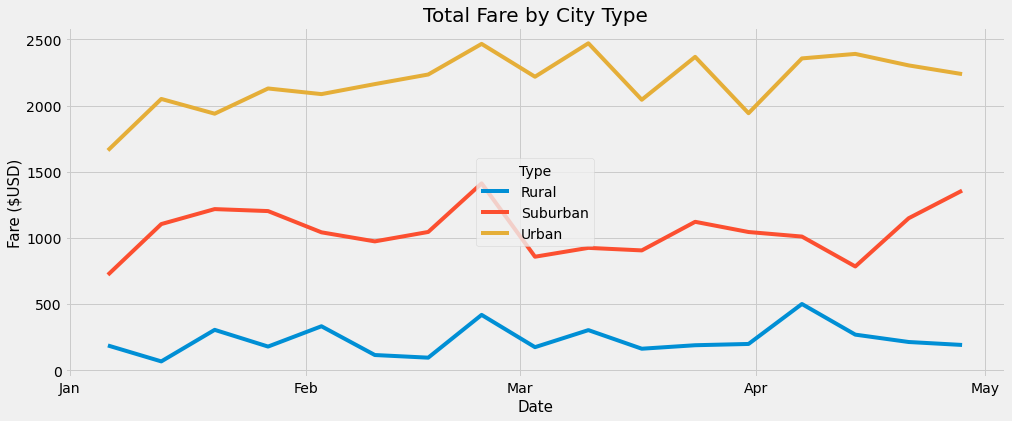

In [108]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(fares_by_week_df)
ax.set_title('Total Fare by City Type',fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_xticks(fares_by_week_df.index)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.legend(['Rural','Suburban','Urban'],title='Type',loc='center')

ax.figure.savefig('C:/Users/ryanj/github/PyBer_Analysis/analysis/final_fig.png')